In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
rNames = ['userId', 'movieId', 'rating', 'timeStamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rNames, engine='python')

uNames = ['userId', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=uNames, engine='python')

mNames = ['movieId', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mNames, engine='python')

In [3]:
mData = pd.merge(pd.merge(ratings, users), movies)
mData.head()

,userId,movieId,rating,timeStamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [5]:
movieData = mData.set_index(mData.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, mData.columns]
movieData.head(25)

,userId,movieId,rating,timeStamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


###### Aggregate rating by movie genre 

In [6]:
aggByGenre = movieData.groupby('genres').agg({'rating':[np.mean]})
aggByGenre

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332


###### Aggregate rating of genres split by Gender

In [7]:
ratingsByGender = movieData.pivot_table('rating', index=['genres','gender'], aggfunc='mean')
ratingsByGender

rating
genres      gender          
Action      F       3.490252
            M       3.491386
Adventure   F       3.512879
            M       3.468125
Animation   F       3.744702
            M       3.661335
Children's  F       3.572548
            M       3.358961
Comedy      F       3.571938
            M       3.503667
Crime       F       3.689332
            M       3.713720
Documentary F       3.946392
            M       3.928811
Drama       F       3.765662
            M       3.766589
Fantasy     F       3.513076
            M       3.426603
Film-Noir   F       4.018087
            M       4.092254
Horror      F       3.202870
            M       3.217891
Musical     F       3.809108
            M       3.596332
Mystery     F       3.686548
            M       3.662009
Romance     F       3.673579
            M       3.573262
Sci-Fi      F       3.450255
            M       3.469952
Thriller    F       3.573360
            M       3.569685
War         F       3.893138
            M       3.893375
Western     F       3.551913
            M       3.655120

In [8]:
meanRatingsF = ratingsByGender.query('gender == ["F"]')
meanRatingsM = ratingsByGender.query('gender == ["M"]')

###### Top 5 rated genres by women 

In [9]:
topRatingsF = meanRatingsF.sort_values(by='rating', ascending=False)
topRatingsF.head()

,,rating
genres,gender,
Film-Noir,F,4.018087
Documentary,F,3.946392
War,F,3.893138
Musical,F,3.809108
Drama,F,3.765662


###### Top 5 rated genres by men 

In [10]:
topRatingsM = meanRatingsM.sort_values(by='rating', ascending=False)
topRatingsM.head()

,,rating
genres,gender,
Film-Noir,M,4.092254
Documentary,M,3.928811
War,M,3.893375
Drama,M,3.766589
Crime,M,3.713720


###### A breakdown of a movies ratings by age, use any movie of your c

In [11]:
mostRated = movieData.groupby(['movieId']).size().sort_values(ascending=False)[:50]
mostRated

movieId
1196    14950
1210    14415
260     11964
1580    10152
1197     9272
1617     9152
1097     9076
2628     9000
1214     8096
480      8016
2916     7984
2028     7959
589      7947
2571     7770
608      7539
110      7329
1200     7280
919      6872
924      6864
1127     6860
2858     6856
858      6669
356      6582
2000     6508
1240     6294
1        6231
592      5724
380      5600
2699     5468
588      5404
2987     5397
2406     5380
1259     5355
34       5253
1073     5252
2054     5225
780      5190
3175     5184
2081     5175
1270     5166
593      5156
2355     5109
1221     5076
1198     5028
1544     5020
912      5007
377      4950
2657     4932
3114     4755
2396     4738
dtype: int64

###### A breakdown of a movies ratings by age, for the most reviewed movie (Star Wars Episode 5)

In [12]:
ageData = movieData[movieData['movieId']==1196].groupby(['title', 'age'])
ageData.agg({'rating': [np.mean, min, max, np.median]})

rating          \
                                                            mean min max   
title                                              age                     
Star Wars: Episode V - The Empire Strikes Back ... 1    4.184783   1   5   
                                                   18   4.442142   1   5   
                                                   25   4.390306   1   5   
                                                   35   4.153846   1   5   
                                                   45   4.137168   2   5   
                                                   50   4.033981   1   5   
                                                   56   4.123894   1   5   

                                                               
                                                       median  
title                                              age         
Star Wars: Episode V - The Empire Strikes Back ... 1        4  
                                                   18       5  
                                                   25       5  
                                                   35       4  
                                                   45       4  
                                                   50       4  
                                                   56       4

###### A gender based comparison of movie ratings 

In [13]:
compByGender = movieData.pivot_table(index=['movieId', 'title'],
                           columns=['gender'],
                           values='rating',
                           fill_value=0)
compByGender.head()

,gender,F,M
movieId,title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [14]:
compByGender['diff'] = compByGender.M - compByGender.F
compByGender.reset_index('movieId', inplace=True)

###### Movies favoured by Men Vs. Women 

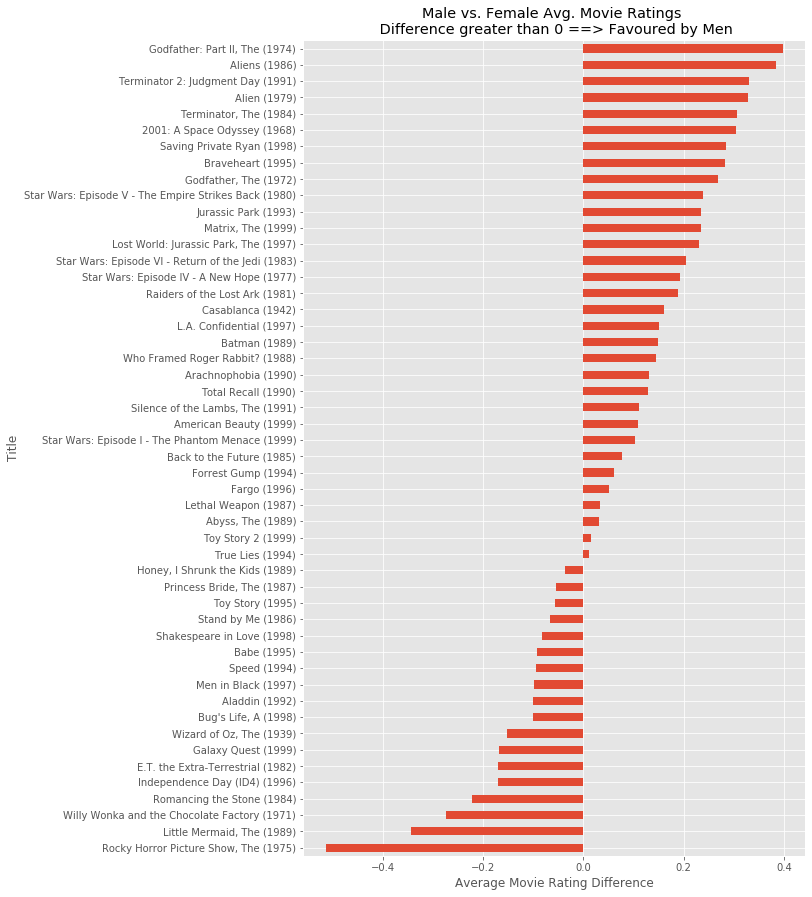

In [15]:
diffRating = compByGender[compByGender.movieId.isin(mostRated.index)]['diff'].sort_values()
diffRating.plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Movie Ratings \n Difference greater than 0 ==> Favoured by Men')
plt.ylabel('Title')
plt.xlabel('Average Movie Rating Difference');

###### 1.  Age group likes animation movies the most?
###### 2. What is the most favorite animation movies for each age group?

In [16]:
subData = movieData[['age', 'genres', 'rating']]
animationData = subData[subData['genres'] == 'Animation']
aveRatingByAge = animationData.groupby(['age', 'genres']).mean()

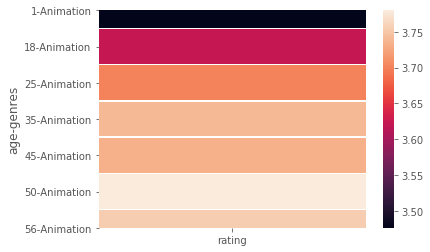

In [17]:
ax = sns.heatmap(aveRatingByAge, linewidth=0.5)
plt.show()

In [18]:
ageGenreSubset = movieData[['age', 'genres', 'rating', 'title']]
AgeAnimation = ageGenreSubset[ageGenreSubset['genres'] == 'Animation']
RatingByAgeGroup = AgeAnimation.groupby(['age', 'title']).mean().sort_values(by='rating', ascending=False).groupby(['age']).head(1)

In [19]:
RatingByAgeGroup

,,rating
age,title,
56,Creature Comforts (1990),5.000000
50,"Wrong Trousers, The (1993)",4.660000
45,"Wrong Trousers, The (1993)",4.647059
1,"Princess Mononoke, The (Mononoke Hime) (1997)",4.636364
18,"Close Shave, A (1995)",4.568000
25,"Close Shave, A (1995)",4.543860
35,I Married A Strange Person (1997),4.500000


###### Highest Rated Movies (Minimum of 50 ratings)

In [20]:
aggTitleData = movieData.groupby('title').agg({'rating': [np.size, np.mean]})
min50Ratings = aggTitleData['rating']['size'] >= 50
aggTitleData[min50Ratings].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Sanjuro (1962)                                        138  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...   1256  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                6669  4.524966
Close Shave, A (1995)                                1971  4.520548
Usual Suspects, The (1995)                           3566  4.517106
Schindler's List (1993)                              4608  4.510417
Wrong Trousers, The (1993)                           1764  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       5028  4.477725
Rear Window (1954)                                   2100  4.476190
Paths of Glory (1957)                                 460  4.473913
Star Wars: Episode IV - A New Hope (1977)           11964  4.453694
Third Man, The (1949)                                 960  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   2734  4.449890

###### Lowest rated movies (min 50 user ratings)

In [21]:
aggTitleData[min50Ratings].sort_values([('rating', 'mean')], ascending=True)[:15]

rating          
                                                 size      mean
title                                                          
Turbo: A Power Rangers Movie (1997)               132  1.318182
3 Ninjas: High Noon On Mega Mountain (1998)        94  1.361702
Carnosaur 2 (1995)                                 52  1.461538
Kazaam (1996)                                     360  1.466667
Digimon: The Movie (2000)                         129  1.488372
Garbage Pail Kids Movie, The (1987)                64  1.531250
Barney's Great Adventure (1998)                    80  1.550000
Meatballs III (1987)                               65  1.553846
Problem Child 2 (1991)                             99  1.555556
Iron Eagle IV (1995)                              116  1.603448
Battlefield Earth (2000)                          684  1.611111
Mighty Morphin Power Rangers: The Movie (1995)    186  1.612903
Pok�mon the Movie 2000 (2000)                     200  1.620000
Aces: Iron Eagle III (1992)                       250  1.640000
Steel (1997)                                       67  1.641791